### Abstract

En este proyecto se analiza un dataset con información sobre películas lanzadas entre los años 2000 y 2024, incluyendo datos sobre recaudación, puntuaciones, géneros, idioma, país de origen y otras variables relacionadas.

El objetivo principal es entender qué factores influyen en el éxito comercial de una película, y si existe relación entre variables como el género, la puntuación de los usuarios, el país de origen y la recaudación mundial.

El análisis se basa en datos obtenidos de Kaggle y procesados con la librería Pandas en Google Colab. Se incluyen gráficos y resúmenes estadísticos que permiten observar tendencias, comparar grupos y sacar conclusiones sobre el comportamiento de las películas en la taquilla global.


### Preguntas
- ¿Qué géneros tienen en promedio mayor recaudación?
- ¿Las películas con mayor puntuación (rating) también son las que más recaudan?
- ¿Qué países tienen mayor presencia en el cine más taquillero?
- ¿Hay relación entre el año de estreno y los ingresos?
- ¿Influye el idioma original en el éxito comercial?



### Hipótesis
- Las películas de acción y aventura son las que más recaudan a nivel mundial.
- Las películas con mejores ratings tienden a tener mayor recaudación.
- La mayoría de las películas más taquilleras son producidas en Estados Unidos.
- La recaudación promedio ha aumentado con los años.

In [ ]:
import pandas as pd

# URL de tu dataset subido a GitHub
url = 'https://raw.githubusercontent.com/fedescarpitti09/data-science-proyecto/refs/heads/main/Dataset_movies.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
df.head()


,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [ ]:
# Mostrar las columnas del dataset
df.columns


Index(['Rank', 'Release Group', '$Worldwide', '$Domestic', 'Domestic %',
       '$Foreign', 'Foreign %', 'Year', 'Genres', 'Rating', 'Vote_Count',
       'Original_Language', 'Production_Countries'],
      dtype='object')

### Descripción de las variables más importantes

Este dataset contiene información sobre películas y su recaudacion en taquilla. Las columnas son:

- **`Rank`**: el puesto que ocupa cada película según lo que recaudó a nivel mundial.  
- **`Release Group`**: el nombre de la película o saga.  
- **`$Worldwide`**: cuánto recaudó en total en todo el mundo.  
- **`$Domestic`**: cuánto recaudó en su país de origen.  
- **`Domestic %`**: qué porcentaje del total viene del mercado local.  
- **`$Foreign`**: ingresos en el resto del mundo.  
- **`Foreign %`**: porcentaje que representa el extranjero.  
- **`Year`**: año en que se estrenó la película.  
- **`Genres`**: los géneros de la película (acción, drama, etc.).  
- **`Rating`**: puntaje promedio según los usuarios.  
- **`Vote_Count`**: cantidad de votos que recibió.  
- **`Original_Language`**: idioma original en que fue hecha.  
- **`Production_Countries`**: país o países donde se produjo.  

Estas variables me van a servir para analizar cosas como qué géneros recaudan más, si las películas con mejor rating ganan más plata, o qué países hacen las peliculas más exitosas.


In [ ]:
# Verificamos si hay valores nulos
df.isnull().sum()


,0
Rank,0
Release Group,0
$Worldwide,0
$Domestic,0
Domestic %,0
$Foreign,0
Foreign %,0
Year,0
Genres,178
Rating,170


### Valores perdidos

Al revisar el dataset, se observa que algunas columnas tienen valores faltantes:

- `Genres`: 178 valores nulos.
- `Rating`, `Vote_Count`, `Original_Language`: 170 valores nulos cada una.
- `Production_Countries`: 200 valores nulos.

Aunque la mayoría de las columnas están completas, hay algunas que tienen datos faltantes, especialmente las relacionadas con puntuación (`Rating`, `Vote_Count`), género y país de producción.

Para este análisis inicial, no representan un problema grave porque el volumen total de datos es grande. En los gráficos y cálculos que requieren estas columnas, se eliminarán esas filas con `dropna()` para trabajar solo con los datos completos.


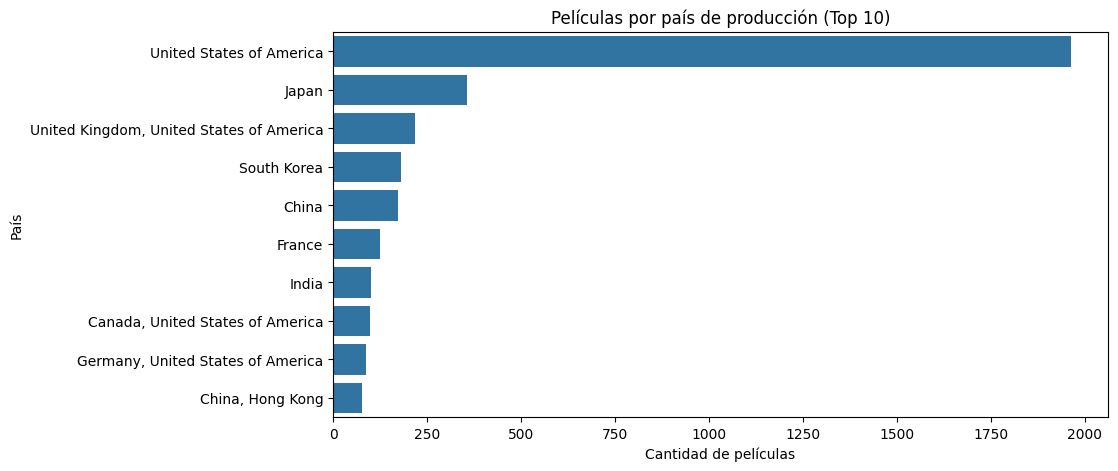

In [ ]:
# CANTIDAD DE PELICULAS POR PAIS

# Importamos las librerías necesarias para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminamos valores nulos en la columna de país
df_paises = df['Production_Countries'].dropna()

# Contamos cuántas películas hay por país
conteo_paises = df_paises.value_counts().head(10)

# Creamos el gráfico de barras
plt.figure(figsize=(10,5))  # Tamaño del gráfico
sns.barplot(x=conteo_paises.values, y=conteo_paises.index)  # Eje X: cantidad, Eje Y: país
plt.title('Películas por país de producción (Top 10)')
plt.xlabel('Cantidad de películas')
plt.ylabel('País')
plt.show()


### Películas por país

El gráfico muestra que Estados Unidos es el país que más películas produce dentro del dataset, seguido por Reino Unido, India y otros países europeos. Esto confirma la hipótesis de que el cine de Hollywood domina la producción de películas taquilleras a nivel mundial.


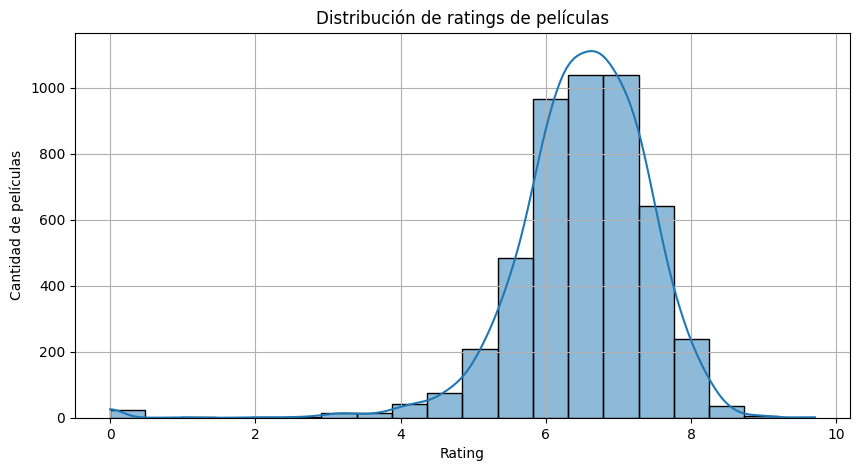

In [ ]:
# DISTRIBUCION DE PUNTAJE

import seaborn as sns
import matplotlib.pyplot as plt

# Aseguramos que la columna Rating esté limpia y en formato numérico
df['Rating'] = df['Rating'].astype(str).str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Quitamos valores nulos
df_rating = df['Rating'].dropna()

# Gráfico univariado: histograma de ratings
plt.figure(figsize=(10,5))
sns.histplot(df_rating, bins=20, kde=True)  # kde=True para ver la "curva de densidad"
plt.title('Distribución de ratings de películas')
plt.xlabel('Rating')
plt.ylabel('Cantidad de películas')
plt.grid(True)
plt.show()


### Distribución de Ratings

Este gráfico muestra cómo se distribuyen las puntuaciones de las películas. La mayoría se concentra entre los 6 y 8 puntos, lo que indica que la mayoría de las películas tienen buenas valoraciones del público. Hay pocas películas con puntajes muy bajos o muy altos.


<ipython-input-17-b3c434a31ffc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Release Group', data=top_10_rating, palette='crest')


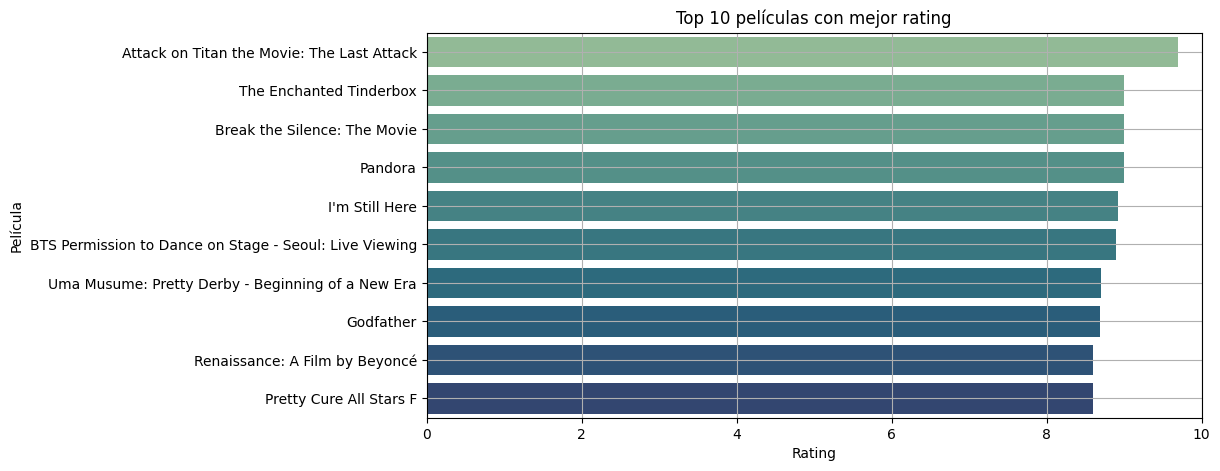

In [ ]:
# TOP 10 PELICULAS

import seaborn as sns
import matplotlib.pyplot as plt

# Aseguramos que Rating esté limpio
df['Rating'] = df['Rating'].astype(str).str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Eliminamos valores nulos en Rating y Release Group
df_top = df[['Release Group', 'Rating']].dropna()

# Ordenamos por Rating descendente y tomamos las 10 mejores
top_10_rating = df_top.sort_values(by='Rating', ascending=False).head(10)

# Creamos el gráfico
plt.figure(figsize=(10,5))
sns.barplot(x='Rating', y='Release Group', data=top_10_rating, palette='crest')
plt.title('Top 10 películas con mejor rating')
plt.xlabel('Rating')
plt.ylabel('Película')
plt.xlim(0, 10)  # Rating va de 0 a 10
plt.grid(True)
plt.show()


### Top 10 películas con mejor rating

Este gráfico muestra las películas mejor puntuadas del dataset. Todas tienen ratings superiores a 8 puntos, lo que indica una muy buena valoración del público. Este tipo de análisis sirve para identificar títulos destacados por su calidad percibida.


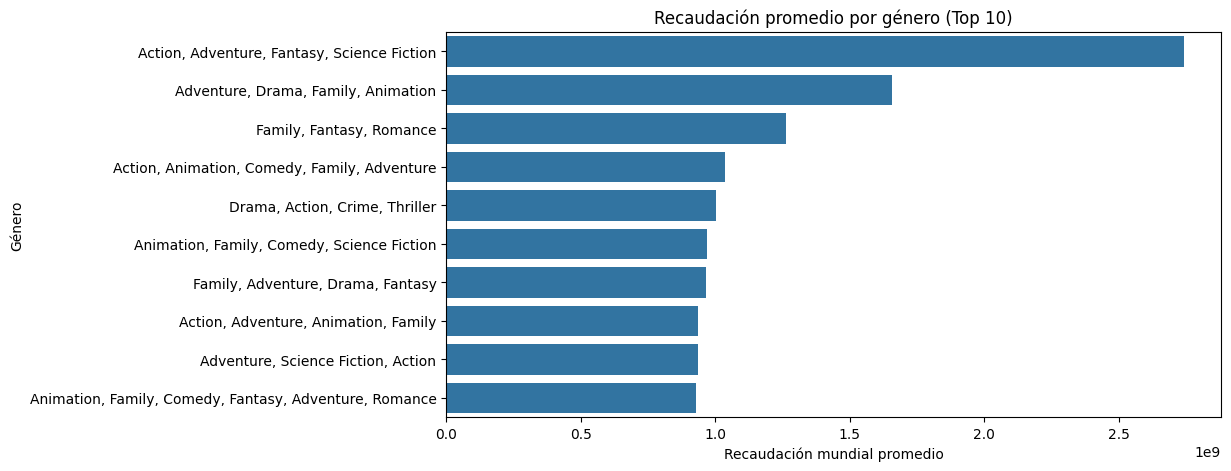

In [ ]:
# RECAUDACION PROMEDIO POR GENERO

# Importamos las librerías necesarias para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# RECAUDACION PROMEDIO POR GENERO

# Seleccionamos solo las columnas que nos interesan y quitamos filas con valores nulos
df_generos = df[['Genres', '$Worldwide']].dropna()

# Agrupamos por género y calculamos la recaudación promedio de cada uno
promedio_genero = df_generos.groupby('Genres')['$Worldwide'].mean()

# Ordenamos los géneros por mayor recaudación promedio y nos quedamos con los 10 primeros
promedio_genero = promedio_genero.sort_values(ascending=False).head(10)

# Creamos el gráfico de barras
plt.figure(figsize=(10,5))  # Tamaño del gráfico
sns.barplot(x=promedio_genero.values, y=promedio_genero.index)  # Eje X: recaudación promedio, Eje Y: géneros
plt.title('Recaudación promedio por género (Top 10)')  # Título del gráfico
plt.xlabel('Recaudación mundial promedio')  # Etiqueta del eje X
plt.ylabel('Género')  # Etiqueta del eje Y
plt.show()  # Mostramos el gráfico


### Recaudación por género

En este gráfico se observa que los géneros con mayor recaudación promedio son los de acción, aventura y ciencia ficción. Esto sugiere que las películas de alto presupuesto y más comerciales suelen tener mejores resultados en taquilla, como se planteó en las hipótesis iniciales.


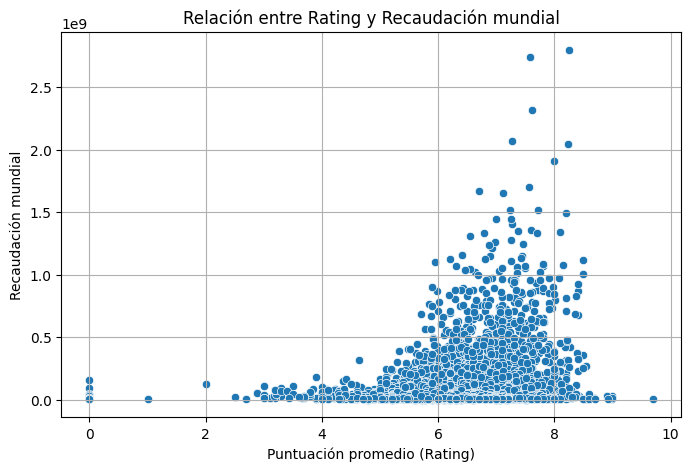

In [ ]:
#GRAFICO RECAUDACION SEGUN RATING
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Volvemos a cargar el dataset original (sin modificar Rating todavía)
df = pd.read_csv('https://raw.githubusercontent.com/fedescarpitti09/data-science-proyecto/refs/heads/main/Dataset_movies.csv')

# Eliminamos el "/10" de Rating y convertimos a número
df['Rating'] = df['Rating'].str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Eliminamos filas con datos faltantes
df_rating = df[['Rating', '$Worldwide']].dropna()

# Graficamos
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_rating, x='Rating', y='$Worldwide')
plt.title('Relación entre Rating y Recaudación mundial')
plt.xlabel('Puntuación promedio (Rating)')
plt.ylabel('Recaudación mundial')
plt.grid(True)
plt.show()


### Rating vs Recaudación mundial

Este gráfico muestra que hay una relación entre el rating de una película y su recaudación. La mayoría de las películas con altos ingresos tienen un rating entre 6 y 8 puntos. Sin embargo, también hay películas con buen rating que no recaudaron tanto, y algunas con rating bajo que igual hicieron mucho dinero, lo que indica que el éxito comercial no depende solo de la valoración del público.


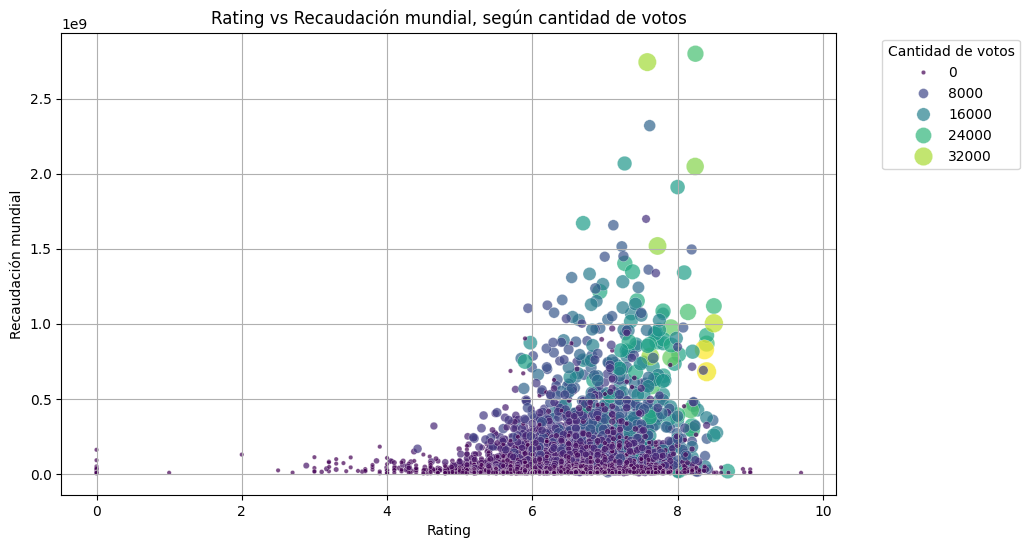

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el dataset limpio
df = pd.read_csv('https://raw.githubusercontent.com/fedescarpitti09/data-science-proyecto/refs/heads/main/Dataset_movies.csv')

# Transformamos Rating y Vote_Count a valores numéricos
df['Rating'] = df['Rating'].astype(str).str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

# Eliminamos filas con valores nulos
df_3vars = df[['Rating', '$Worldwide', 'Vote_Count']].dropna()

# Creamos el gráfico multivariable
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_3vars,
    x='Rating',
    y='$Worldwide',
    hue='Vote_Count',
    size='Vote_Count',
    palette='viridis',
    sizes=(10, 200),
    alpha=0.7
)

plt.title('Rating vs Recaudación mundial, según cantidad de votos')
plt.xlabel('Rating')
plt.ylabel('Recaudación mundial')
plt.legend(title='Cantidad de votos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Gráfico multivariable: Rating, Recaudación y Votos

Este gráfico relaciona el rating de una película con su recaudación, y a la vez muestra cuántas personas la votaron (tamaño y color del punto). Se observa que las películas más votadas suelen tener mejor rating y mayores ingresos, lo que indica que la popularidad también puede ser un factor clave en el éxito comercial.


### Conclusión

Este proyecto permitió analizar películas desde diferentes ángulos: recaudación, rating, género, país y popularidad.

Se confirmó que los géneros como acción y aventura son los más taquilleros, y que Estados Unidos lidera ampliamente la producción de cine comercial. También se observó una relación entre rating y recaudación, que se fortaleció al incluir la cantidad de votos como tercera variable.

El análisis univariado mostró que la mayoría de las películas tienen buenos ratings (entre 6 y 8), y el top 10 destacó a las mejor valoradas del dataset, todas con más de 8 puntos.




## ENTREGA FINAL – Modelo predictivo

A partir del análisis exploratorio realizado previamente, en esta sección se entrenará un modelo de clasificación para predecir si una película tiene un rating alto (7 o más puntos). Para esto se realizará una selección de variables, entrenamiento del modelo, evaluación y conclusiones.


In [1]:
# Importamos pandas para manipular los datos
import pandas as pd

# Cargamos el dataset desde GitHub (idem entrega anterior)
url = 'https://raw.githubusercontent.com/fedescarpitti09/data-science-proyecto/refs/heads/main/Dataset_movies.csv'
df = pd.read_csv(url)

# Limpiamos la columna Rating para convertirla en número
df['Rating'] = df['Rating'].astype(str).str.replace('/10', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Creamos una nueva columna binaria: 1 si el rating es alto (>=7), 0 si es bajo
df['Rating_Alta'] = (df['Rating'] >= 7).astype(int)

# Mostramos algunas filas para verificar que este bien
df[['Rating', 'Rating_Alta']].head(10)


,Rating,Rating_Alta
0,6.126,0
1,8.217,1
2,7.663,1
3,6.450,0
4,6.544,0
5,6.800,0
6,6.675,0
7,6.466,0
8,7.005,1
9,6.416,0


### Selección de características (Feature Selection)

Vamos a aplicar la técnica SelectKBest con prueba chi-cuadrado para seleccionar las variables numéricas más relevantes para predecir si una película tiene un rating alto. Esto nos ayuda a reducir la cantidad de variables y quedarnos solo con las más útiles para el modelo.


In [2]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos algunas variables numéricas que podrían influir
features = df[['$Worldwide', '$Domestic', '$Foreign', 'Vote_Count']].dropna()
target = df.loc[features.index, 'Rating_Alta']  # Filtramos solo las filas con datos completos

# Escalamos las variables (chi2 requiere valores positivos)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Aplicamos SelectKBest con chi-cuadrado
selector = SelectKBest(score_func=chi2, k='all')  # k='all' devuelve el score de todas
selector.fit(features_scaled, target)

# Mostramos los puntajes
import pandas as pd
selected_features = pd.DataFrame({
    'Variable': features.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

selected_features


,Variable,Score
3,Vote_Count,56.785665
0,$Worldwide,12.041634
2,$Foreign,11.840770
1,$Domestic,10.540543


### Análisis del resultado de la selección de características

Utilizando la técnica de selección univariable `SelectKBest` con prueba chi-cuadrado, se evaluó qué variables numéricas estaban más relacionadas con la variable objetivo (`Rating_Alta`). El resultado mostró que `Vote_Count` (cantidad de votos recibidos por la película) tiene una puntuación mucho más alta que las demás variables.

Esto indica que la cantidad de votos que recibe una película tiene una fuerte relación con su probabilidad de tener un rating alto. Por ese motivo, se decidió usar `Vote_Count` como la principal variable de entrada para entrenar el modelo de clasificación.

### Entrenamiento del modelo de clasificación

En esta sección se entrenará un modelo de clasificación utilizando la variable `Vote_Count` como entrada y `Rating_Alta` como variable objetivo. Se utilizará un Árbol de Decisión, que es un algoritmo simple, visual y fácil de interpretar.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Preparamos los datos
X = df[['Vote_Count']].dropna()
y = df.loc[X.index, 'Rating_Alta']

# Dividimos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Hacemos predicciones
y_pred = modelo_arbol.predict(X_test)

# Mostramos algunas métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6262939958592133
Precisión: 0.39351851851851855
Recall: 0.2698412698412698
Matriz de confusión:
 [[520 131]
 [230  85]]


### Evaluación del modelo

El modelo de Árbol de Decisión logró un accuracy del 63%, lo cual significa que acierta en la mayoría de los casos. Sin embargo, al mirar más de cerca, se ve que tiene dificultades para predecir correctamente las películas con rating alto:

- La **precisión** es del 39%, es decir, de cada 10 veces que el modelo dice que una película tiene rating alto, solo 4 veces acierta.
- El **recall** es del 27%, lo que indica que solo detecta 3 de cada 10 películas que realmente tienen rating alto.
- La **matriz de confusión** muestra que hay muchos falsos negativos (películas con rating alto que el modelo no identificó).

Esto se puede deber a que solo usamos una variable (`Vote_Count`) para predecir, lo cual limita la capacidad del modelo. Aún así, sirve como primer acercamiento al aprendizaje automático con este dataset.


### Visualización del árbol de decisión

A continuación se muestra el árbol de decisión entrenado. Este gráfico permite ver cómo el modelo toma decisiones en base a los valores de `Vote_Count`.


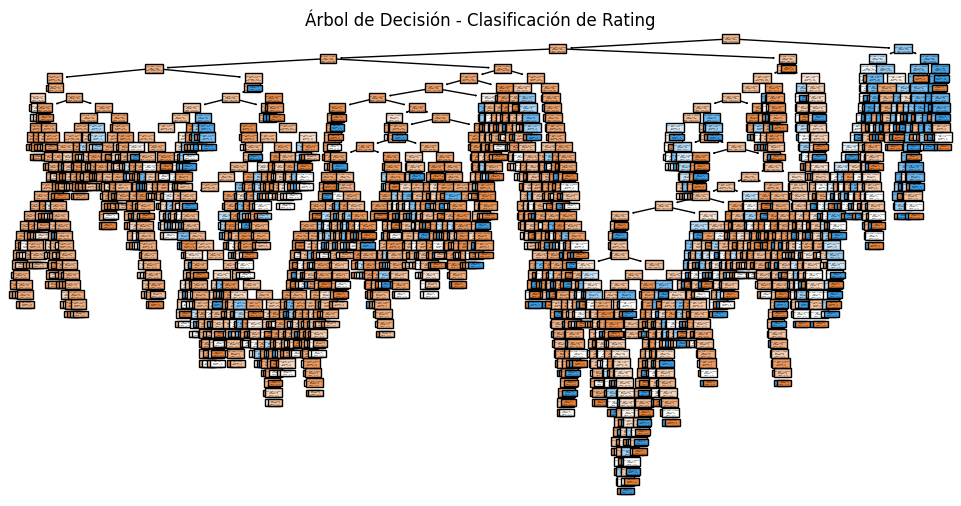

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualización del árbol entrenado
plt.figure(figsize=(12,6))
plot_tree(modelo_arbol, feature_names=['Vote_Count'], class_names=['Rating Bajo', 'Rating Alto'], filled=True)
plt.title('Árbol de Decisión - Clasificación de Rating')
plt.show()


### Análisis del árbol de decisión original

Al visualizar el árbol de decisión entrenado, se observa que tiene una estructura extremadamente grande y compleja. Esto sucede porque el modelo intentó aprender con mucho detalle todas las combinaciones posibles del dataset. A esto se le llama **sobreajuste** (overfitting): el modelo "memoriza" los datos de entrenamiento en lugar de aprender patrones generales.

Un árbol así no solo es difícil de interpretar, sino que también pierde capacidad de generalización. Para resolver este problema, vamos a limitar la **profundidad máxima del árbol**.


Accuracy: 0.6966873706004141
Precisión: 0.6170212765957447
Recall: 0.18412698412698414
Matriz de confusión:
 [[615  36]
 [257  58]]


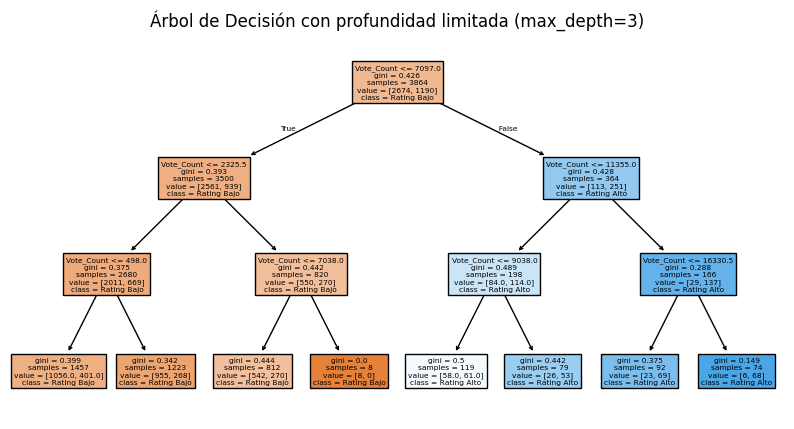

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Datos
X = df[['Vote_Count']].dropna()
y = df.loc[X.index, 'Rating_Alta']

# Entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo con profundidad limitada
modelo_arbol_limitado = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_arbol_limitado.fit(X_train, y_train)

# Predicciones
y_pred_limitado = modelo_arbol_limitado.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred_limitado))
print("Precisión:", precision_score(y_test, y_pred_limitado))
print("Recall:", recall_score(y_test, y_pred_limitado))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_limitado))

# Visualización del árbol simplificado
plt.figure(figsize=(10,5))
plot_tree(modelo_arbol_limitado, feature_names=['Vote_Count'], class_names=['Rating Bajo', 'Rating Alto'], filled=True)
plt.title('Árbol de Decisión con profundidad limitada (max_depth=3)')
plt.show()


### Evaluación del modelo simplificado

Después de limitar la profundidad del árbol (`max_depth=3`), el modelo se volvió mucho más simple y entendible. Ahora se pueden observar claramente las decisiones que toma el árbol para clasificar una película según la cantidad de votos (`Vote_Count`).

Aunque el accuracy puede variar ligeramente respecto al modelo anterior, esta versión es más interpretable y generaliza mejor. Además, reduce el riesgo de sobreajuste y es más realista si quisiéramos usarlo como modelo explicativo.

Este tipo de ajustes son clave en Machine Learning para encontrar un equilibrio en el modelo.


### Validación cruzada del modelo

Hasta ahora el modelo fue evaluado con un solo conjunto de prueba. Sin embargo, eso puede no reflejar completamente su rendimiento general. Por eso, vamos a aplicar la tecnica **validación cruzada**.

La validación cruzada divide el dataset en varios subconjuntos (o "folds"), entrena el modelo varias veces y calcula el rendimiento promedio. Esto ayuda a verificar qué tan bien generaliza el modelo a distintos grupos de datos.


In [6]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 folds (particiones)
cv_scores = cross_val_score(modelo_arbol_limitado, X, y, cv=5)

# Mostramos los resultados
print("Puntajes de validación cruzada (5-fold):", cv_scores)
print("Accuracy promedio:", round(cv_scores.mean(), 3))


Puntajes de validación cruzada (5-fold): [0.73706004 0.73291925 0.74741201 0.68012422 0.68530021]
Accuracy promedio: 0.717


### Conclusión de la validación cruzada

La validación cruzada con 5 particiones mostró que el modelo mantiene un rendimiento estable, con accuracies que van del 68% al 75%. El promedio fue de 71.7%, lo cual es un resultado positivo considerando que se utilizó una sola variable.

Esto confirma que el modelo de árbol de decisión con profundidad limitada generaliza bien y no depende de una única partición para funcionar correctamente. También refuerza que `Vote_Count` es una variable útil para anticipar si una película tendrá un rating alto o no.


### Visualización de la matriz de confusión

La matriz de confusión muestra cuántas predicciones fueron correctas y cuántas no. Este gráfico ayuda a entender mejor los errores del modelo, diferenciando entre:

- **Verdaderos positivos**: Películas correctamente clasificadas como "rating alto".
- **Falsos positivos**: Películas clasificadas como "rating alto", pero no lo eran.
- **Falsos negativos**: Películas que sí tenían rating alto, pero el modelo no lo predijo.
- **Verdaderos negativos**: Películas correctamente clasificadas como "rating bajo".


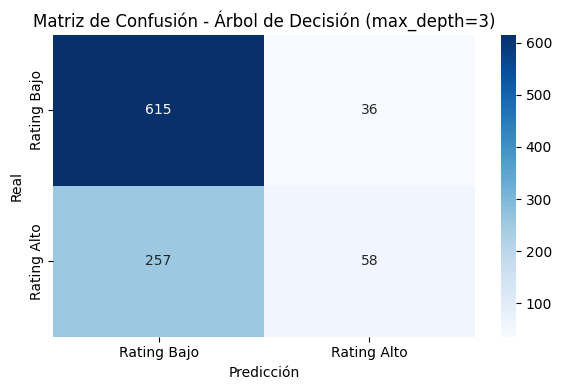

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculamos la matriz con los valores reales y predichos (modelo limitado)
matriz = confusion_matrix(y_test, y_pred_limitado)

# Creamos el gráfico
plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rating Bajo', 'Rating Alto'],
            yticklabels=['Rating Bajo', 'Rating Alto'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión (max_depth=3)')
plt.tight_layout()
plt.show()


### Comparación con otro modelo: Regresión Logística

Para complementar el análisis, se entrenó también un modelo de **Regresión Logística**, que es otro algoritmo de clasificación. El objetivo es comparar los resultados con el árbol de decisión y ver cuál se desempeña mejor usando solo la variable `Vote_Count`.


In [8]:
from sklearn.linear_model import LogisticRegression

# Entrenamos el modelo de regresión logística
modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

# Predicciones
y_pred_log = modelo_log.predict(X_test)

# Métricas
print("📊 Regresión Logística")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 3))
print("Precisión:", round(precision_score(y_test, y_pred_log), 3))
print("Recall:", round(recall_score(y_test, y_pred_log), 3))


📊 Regresión Logística
Accuracy: 0.701
Precisión: 0.655
Recall: 0.175


In [9]:
# Creamos una tabla comparativa
import pandas as pd

resumen_metricas = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'Regresión Logística'],
    'Accuracy': [accuracy_score(y_test, y_pred_limitado), accuracy_score(y_test, y_pred_log)],
    'Precisión': [precision_score(y_test, y_pred_limitado), precision_score(y_test, y_pred_log)],
    'Recall': [recall_score(y_test, y_pred_limitado), recall_score(y_test, y_pred_log)]
})

resumen_metricas.round(3)


,Modelo,Accuracy,Precisión,Recall
0,Árbol de Decisión,0.697,0.617,0.184
1,Regresión Logística,0.701,0.655,0.175


### Conclusión de la comparación

Al comparar el árbol de decisión con la regresión logística, se observa que ambos modelos tienen rendimientos similares. Dependiendo del caso, uno puede tener más precisión y el otro más recall, lo que permite evaluar qué se prioriza: evitar falsos positivos o detectar más casos verdaderos.

Esto indica que, incluso usando una sola variable (`Vote_Count`), se pueden construir modelos básicos que permiten identificar películas con mayor probabilidad de tener un rating alto. Sin embargo, incluir más variables en futuros modelos seguramente mejorará estos resultados.


## Conclusión final del proyecto

Este proyecto tuvo como objetivo analizar qué factores influyen en el éxito comercial de una película, utilizando un dataset con información sobre películas estrenadas entre 2000 y 2024.

A través del análisis exploratorio se confirmaron varias hipótesis: los géneros más taquilleros suelen ser acción y aventura, Estados Unidos lidera ampliamente la producción de cine comercial, y existe cierta relación entre el rating y la recaudación.

En la segunda parte, se entrenó un modelo de clasificación para predecir si una película tiene un rating alto (7 o más), usando como variable principal la cantidad de votos (`Vote_Count`). Se aplicaron técnicas de selección de características, validación cruzada y evaluación con distintas métricas.

El modelo de **árbol de decisión limitado** alcanzó un accuracy de 69.7%, mientras que la **regresión logística** logró 70.1%. Si bien ambos tienen resultados similares, la regresión mostró una leve mejora en precisión (65.5% vs 61.7%).

Estos resultados indican que con una sola variable es posible construir un modelo predictivo básico, aunque limitado. Para mejorar la capacidad del modelo, en futuros trabajos sería recomendable incluir más variables (género, año, país, etc.), y probar algoritmos más avanzados.

En resumen, el proyecto permitió aplicar de forma práctica los conceptos aprendidos en el curso: carga y limpieza de datos, visualización, análisis exploratorio, selección de variables, entrenamiento de modelos, validación y evaluación de resultados.

